# Chapter3 데이터 정제와 응용

# 3.1 데이터 필터링과 정렬 테크닉

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
#초보자용 실습에 주로 쓰이는 캐글의 타이타닉 데이터 로드하기

titanic = pd.read_csv('./bumping-into-data-analysis-main/datasets/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 📌조건식을 활용한 데이터 필터링

#### 단일 조건식 활용하여 필터링하기

In [6]:
#객실등급이 3등급인 데이터만 추출

titanic[titanic.Pclass == 3].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


#### 다중 조건식 활용하여 데이터 필터링하기

In [7]:
#객실등급이 3등급이면서 여성인 데이터만 추출

titanic[(titanic.Pclass == 3) & (titanic.Sex == 'female')].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S


#### 특정 값을 제외한 데이터 추출하기

In [8]:
#객실등급이 3등급이지만 여성이 아닌 데이터만 추출

titanic[(titanic.Pclass == 3) & (titanic.Sex != 'female')].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S


## 📌loc 조건부 필터링
- 판다스의 인덱싱 함수인 loc를 활용하여 조건 필터링

In [9]:
#탑승요금이 300 이상인 데이터 추출
#loc 활용

titanic.loc[titanic.Fare > 300, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [10]:
#iloc 활용

titanic.iloc[list(titanic.Fare > 300)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [12]:
# 조건 여러 개인 경우 '&' 사용

titanic.loc[
    (titanic.Sex == 'female') & (titanic.Fare > 240),      #다중 조건 입력
    ['Name', 'Age', 'Fare', 'Embarked']    #특정 컬럼만 선택
]

,Name,Age,Fare,Embarked
88,"Fortune, Miss. Mabel Helen",23.0,263.0000,S
258,"Ward, Miss. Anna",35.0,512.3292,C
299,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",50.0,247.5208,C
311,"Ryerson, Miss. Emily Borie",18.0,262.3750,C
341,"Fortune, Miss. Alice Elizabeth",24.0,263.0000,S
742,"Ryerson, Miss. Susan Parker ""Suzette""",21.0,262.3750,C


## 📌특정 값 포함 여부 필터링 : isin() / 포함하지 않는 경우 '~' 삽입

#### 단일 컬럼에서 특정 값 포함된 데이터 필터링하기

In [13]:
#선착장이 S or C 에서 탑승한 승객 데이터

titanic[titanic.Embarked.isin(['S', 'C'])].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
titanic[~titanic.Embarked.isin(['S', 'C'])].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q


#### 다중 컬럼에서 특정 값 포함된 데이터 필터링하기
- isin()을 사용한 필터 코드를 미리 변수에 담아두고 데이터프레임에서 해당 변수 호출하기

In [15]:
#성별이 남성이면서 승객 등급이 1, 2등급인 데이터 추출

filter_male = titanic.Sex.isin(['male'])
filter_pclass = titanic.Pclass.isin([1, 2])

titanic[filter_male & filter_pclass].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S


## 📌쿼리를 사용하여 데이터 필터링 : query()
- 데이터 필터링에서 가장 추천하는 방법은 query() 함수 사용하는 것 !
- 가독성이 높고 간편하다
- 함수의 인수에 조건식 삽입
- (주의) 오브젝트 타입의 경우 큰따옴표 사용

In [17]:
#객실 등급이 1, 2 이면서 탑승 요금이 270 이상인 승객 데이터 추출

titanic.query('Pclass == [1, 2] & Fare > 270')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [20]:
#여성이고 객실 등급이 1등급이며 나이가 35살에 해당하는 승객 데이터 추출

titanic.query('Sex == "female" & Pclass == 1 & Age == 35')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
230,231,1,1,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",female,35.0,1,0,36973,83.4750,C83,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
269,270,1,1,"Bissette, Miss. Amelia",female,35.0,0,0,PC 17760,135.6333,C99,S
383,384,1,1,"Holverson, Mrs. Alexander Oskar (Mary Aline To...",female,35.0,1,0,113789,52.0000,NaN,S
486,487,1,1,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",female,35.0,1,0,19943,90.0000,C93,S


## 📌결측값을 제외하고 데이터 필터링 : notnull()

In [21]:
#결측값의 빈도가 가장 높은 Cabin 컬럼에서 결측값 제외한 데이터를 추출

titanic_nn = titanic[titanic.Cabin.notnull()]
titanic_nn.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


## 📌특정 문자가 포함된 데이터 필터링 : contains()

In [22]:
#승객 이름에 'Catherine'이 포함된 데이터 ㅊ출

titanic[titanic['Name'].str.contains('Catherine')].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
362,363,0,3,"Barbara, Mrs. (Catherine David)",female,45.0,0,1,2691,14.4542,NaN,C
448,449,1,3,"Baclini, Miss. Marie Catherine",female,5.0,2,1,2666,19.2583,NaN,C
533,534,1,3,"Peter, Mrs. Catherine (Catherine Rizk)",female,NaN,0,2,2668,22.3583,NaN,C
657,658,0,3,"Bourke, Mrs. John (Catherine)",female,32.0,1,1,364849,15.5000,NaN,Q
670,671,1,2,"Brown, Mrs. Thomas William Solomon (Elizabeth ...",female,40.0,1,1,29750,39.0000,NaN,S


In [23]:
#승객 이름에 'Miss'이 포함된 데이터 ㅊ출

titanic[titanic['Name'].str.contains('Miss')].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q


## 📌다양한 기준으로 데이터 정렬

### sort_values(by=['기준이 되는 컬럼명'])

In [24]:
#Fare 컬럼을 기준으로 내림차순 

titanic.sort_values(by=['Fare'], ascending=False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S


In [25]:
#Fare, Age 컬럼을 기준으로 내림차순

titanic.sort_values(by=['Fare', 'Age'], ascending=False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S


### nlargest(n=개수, columns='정렬기준컬럼') : 내림차순

In [26]:
#성별이 여성인 데이터 중 Age를 기준으로 내림차순. 데이터 10개  

titanic[titanic.Sex == 'female'].nlargest(n=10, columns='Age')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN
366,367,1,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,D37,C
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.0,0,1,PC 17582,153.4625,C125,S
772,773,0,2,"Mack, Mrs. (Mary)",female,57.0,0,0,S.O./P.P. 3,10.5000,E77,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S


### nsmallest(n=개수, columns='정렬기준컬럼') : 오름차순

In [27]:
#성별이 여성인 데이터 중 Age를 기준으로 오름차순. 데이터 10개  

titanic[titanic.Sex == 'female'].nsmallest(n=10, columns='Age')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.00,1,1,347742,11.1333,NaN,S
381,382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.00,0,2,2653,15.7417,NaN,C
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.00,4,2,347082,31.2750,NaN,S
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.00,0,1,347054,10.4625,G6,S
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
479,480,1,3,"Hirvonen, Miss. Hildur E",female,2.00,0,1,3101298,12.2875,NaN,S
530,531,1,2,"Quick, Miss. Phyllis May",female,2.00,1,1,26360,26.0000,NaN,S
642,643,0,3,"Skoog, Miss. Margit Elizabeth",female,2.00,3,2,347088,27.9000,NaN,S


## 📌데이터 순서 역순으로 변경하기

In [28]:
titanic.loc[::-1].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S


In [29]:
#데이터 역순으로 정렬하고 인덱스 새롭게 적용

titanic.loc[::-1].reset_index().head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q
1,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
2,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
3,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
4,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S


In [31]:
## 컬럼의 순서를 역순으로 변경

titanic.loc[:, ::-1].head()

,Embarked,Cabin,Fare,Ticket,Parch,SibSp,Age,Sex,Name,Pclass,Survived,PassengerId
0,S,NaN,7.2500,A/5 21171,0,1,22.0,male,"Braund, Mr. Owen Harris",3,0,1
1,C,C85,71.2833,PC 17599,0,1,38.0,female,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,2
2,S,NaN,7.9250,STON/O2. 3101282,0,0,26.0,female,"Heikkinen, Miss. Laina",3,1,3
3,S,C123,53.1000,113803,0,1,35.0,female,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,4
4,S,NaN,8.0500,373450,0,0,35.0,male,"Allen, Mr. William Henry",3,0,5


# 3.2 결측값 처리
- NaN, Null, Na
- 실제 데이터에서는 결측값이 꽤 많이 존재함

#### [결측값 처리 방법]
1. 결측값이 존재하는 행 삭제 -> 데이터를 분석하는데 큰 정보가 될 수 있는 데이터 포인트를 잃을 가능성이 있음
2. 결측값을 다른 값으로 대체 -> 기존의 다른 데이터 포인트를 참조하여 적절한 값을 유추해야 함

## 📌결측값 시각화하기

In [32]:
import matplotlib.pyplot as plt

### 시본의 heatmap() 함수 사용

<Axes: >

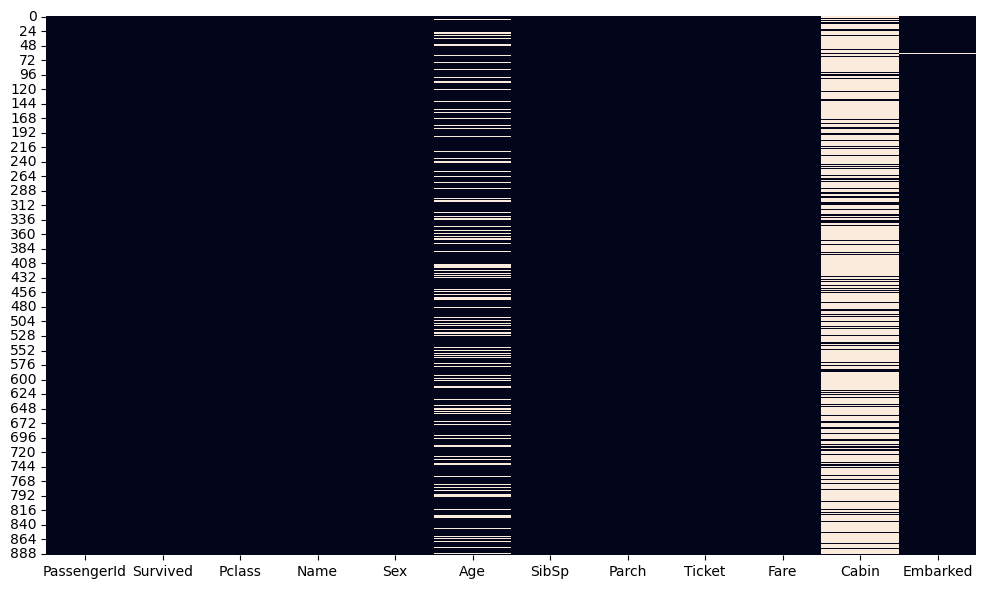

In [33]:
plt.figure(figsize=(12, 7))                           #그래프 출력 사이즈 지정 12 x 7
sns.heatmap(titanic.isnull(), cbar=False) #결측값이 있는 부분만 활성화해서 보여주기

#### -> Age, Cabin, Embarked 컬럼에서 결측값 확인할 수 있고, Cabin 컬럼은 절반 이상이 결측값인 것을 확인할 수 있다

### missingno 라이브러리 - matrix() 함수 사용

In [38]:
!pip install missingno #missingno 설치

<Axes: >

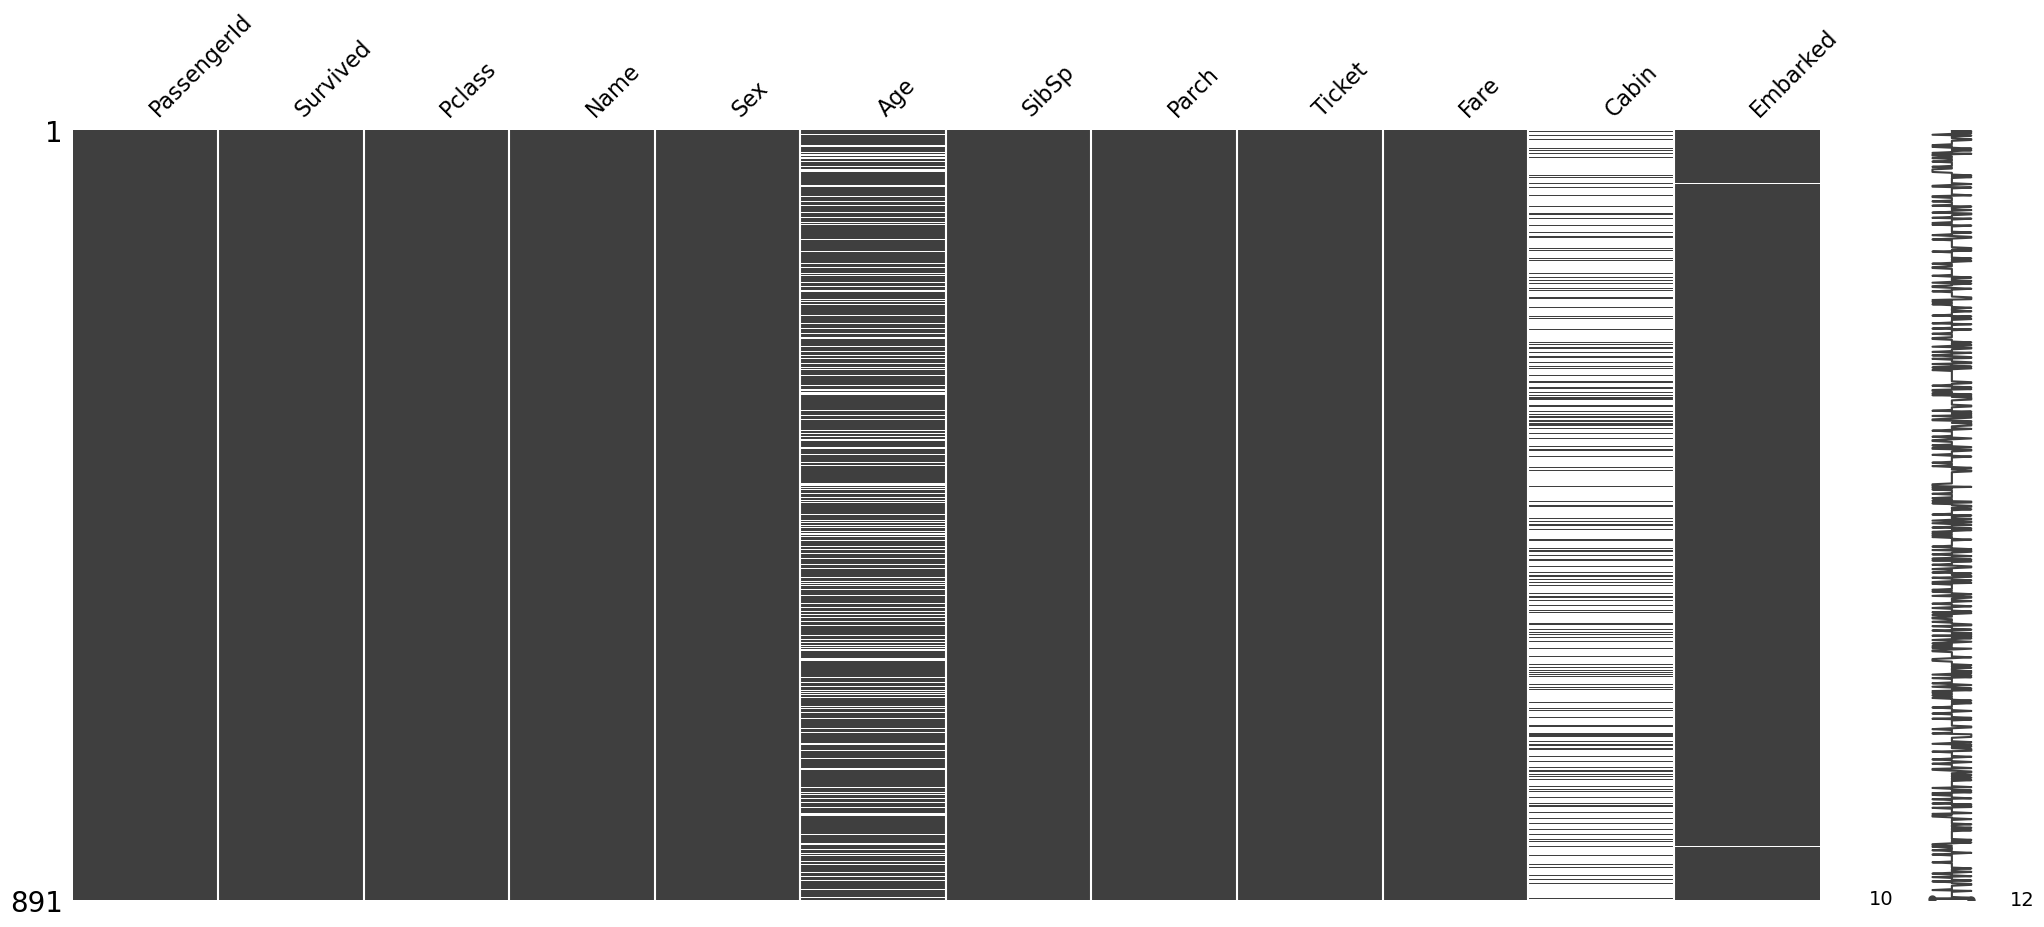

In [39]:
import missingno as msno
msno.matrix(titanic)

## 📌결측값 확인하기 : info()
- 시각화를 통해 데이터셋에 결측값이 존재함을 확인했으니 정확하게 어느 컬럼에 몇 개의 결측값이 존재하는지 데이터로 확인하기

In [40]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


-> non-null : 정상값을 의미
-> 인덱스의 총길이는 891 이므로 그에 못 미치는 컬럼은 결측값이 존재하는다는 의미

In [41]:
#isna()는 결측값 유무를 확인할 수 있음

titanic.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [42]:
#sum() 을 통해 결측값 합산

titanic.isna().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [44]:
#컬럼 1개의 결측값을 확인

titanic.Age.isna().sum()

177

In [45]:
#정상 데이터 확인하기 : notna()

titanic.notna().sum()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

## 📌결측값 삭제/제거
- 결측값을 시각화, 확인까지 마무리 했으면 결측값을 처리하는데 고민을 해야 한다

------------------------------------------------------

ex) '타이타닉 승객의 생존 여부'에 대한 데이터 분석을 한다고 가정할 때, 결측값 처리와 관련한 고민
1. 결측값이 가장 많이 있는 Cabin 컬럼은 오히려 있는 것이 데이터 분석에 방해되지 않을까?
2. 2개 이상의 컬럼에 결측값이 들어 있는 행은 승객의 생존 여부를 분석하는데 도움이 될까?

---

데이터 셋에 많은 변수가 있다면 2개 이상의 결측값이 있는 행은 삭제해도 무리가 없을 것. 그러나 결측값이 1개만 있는 경우 그 행이 데이터를 분석하는 데 결정적인 역할을 하는 행이라면 해당 행을 삭제하면 큰 손실이 될 수도 있다. 따라서 본인의 상황에 따라 적합하게 적용해야 한다.

### 결측값이 존재하는 컬럼/로우 삭제하기

In [46]:
#dropna() : 전체 데이터셋을 기준으로 결측값이 1개 이상인 행이 모두 삭제됨

titanic.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


▶ 원본데이터의 인덱스가 891인데 183로우만 출력된 것을 보면 상당히 많은 데이터가 삭제된 것!

In [47]:
#컬럼 축을 기준으로 결측값이 있는 컬럼 삭제 : axis='columns'

titanic.dropna(axis='columns')

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000


### 모든 컬럼에서 결측값의 개수가 특정 수치를 넘어가는 행만 삭제하기

In [48]:
#how - any : 1개 이상의 컬럼에 결측값이 있는 행, 디폴트 값 (생략가능)
#how - all : 모든 컬럼에 결측값이 있는 행

titanic.dropna(how='any')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


#### 결측값 개수의 임곗값을 설정해서 삭제하는 방법

In [49]:
#2개 이상의 컬럼에 결측값이 존재하는 데이터는 삭제하기

titanic.dropna(thresh=2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [50]:
#컬럼을 지정하여 결측값이 있는 행만 삭제할 수 있음

titanic.dropna(subset=['Age', 'Embarked']) # 둘 중 하나라도 결측값이 존재하는 행은 삭제됨

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 📌결측값 대체/보간

### 특정 값으로 결측값 채우기

In [51]:
#Age 컬럼의 결측값을 25로 채우기
#fillna()

titanic.Age.fillna(25)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    25.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [52]:
#Age 컬럼의 결측값을 25로 채우기
#to_replace()

titanic.Age.replace(to_replace = np.nan, value= 25)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    25.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

### 평균 값으로 결측값 채우기

In [56]:
titanic.Age.fillna(titanic.Age.mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

▶ 가장 좋은 방법은 아님. 범위를 좁혀서 Pclass(객실등급)를 활용하여 나이를 유추해볼 수 있겠다

In [55]:
print(titanic[titanic.Pclass == 1].Age.mean())
print(titanic[titanic.Pclass == 2].Age.mean())
print(titanic[titanic.Pclass == 3].Age.mean())

38.233440860215055
29.87763005780347
25.14061971830986


In [57]:
titanic[titanic.Pclass == 1].Age.fillna(titanic[titanic.Pclass == 1].Age.mean())

1      38.0
3      35.0
6      54.0
11     58.0
23     28.0
       ... 
871    47.0
872    33.0
879    56.0
887    19.0
889    26.0
Name: Age, Length: 216, dtype: float64

### 결측값의 전후 값 참조해서 채우기

In [58]:
titanic.Cabin.fillna(method='ffill') #앞의 데이터 참조 : ffill(or pad) / 뒤의 데이터 참조 : bfill(or backward)

0       NaN
1       C85
2       C85
3      C123
4      C123
       ... 
886     C50
887     B42
888     B42
889    C148
890    C148
Name: Cabin, Length: 891, dtype: object

### 보간법으로 결측값 채우기

In [60]:
#결측값을 기준으로 위 아래 중간값으로

titanic.Age.interpolate(method='linear', limit_direction='forward').head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    44.5
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [61]:
#결측값을 기준으로 가장 가까운 값

titanic.Age.interpolate(method='nearest', limit_direction='forward').head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    35.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

# 3.3 이상값 처리
- 이상값은 시각화 기법을 활용하여 변수의 분포를 확인. 
- 변수가 1개인 경우는 박스플롯이나 히스토그램 사용, 2개 이상은 산점도 활용

## 박스플롯

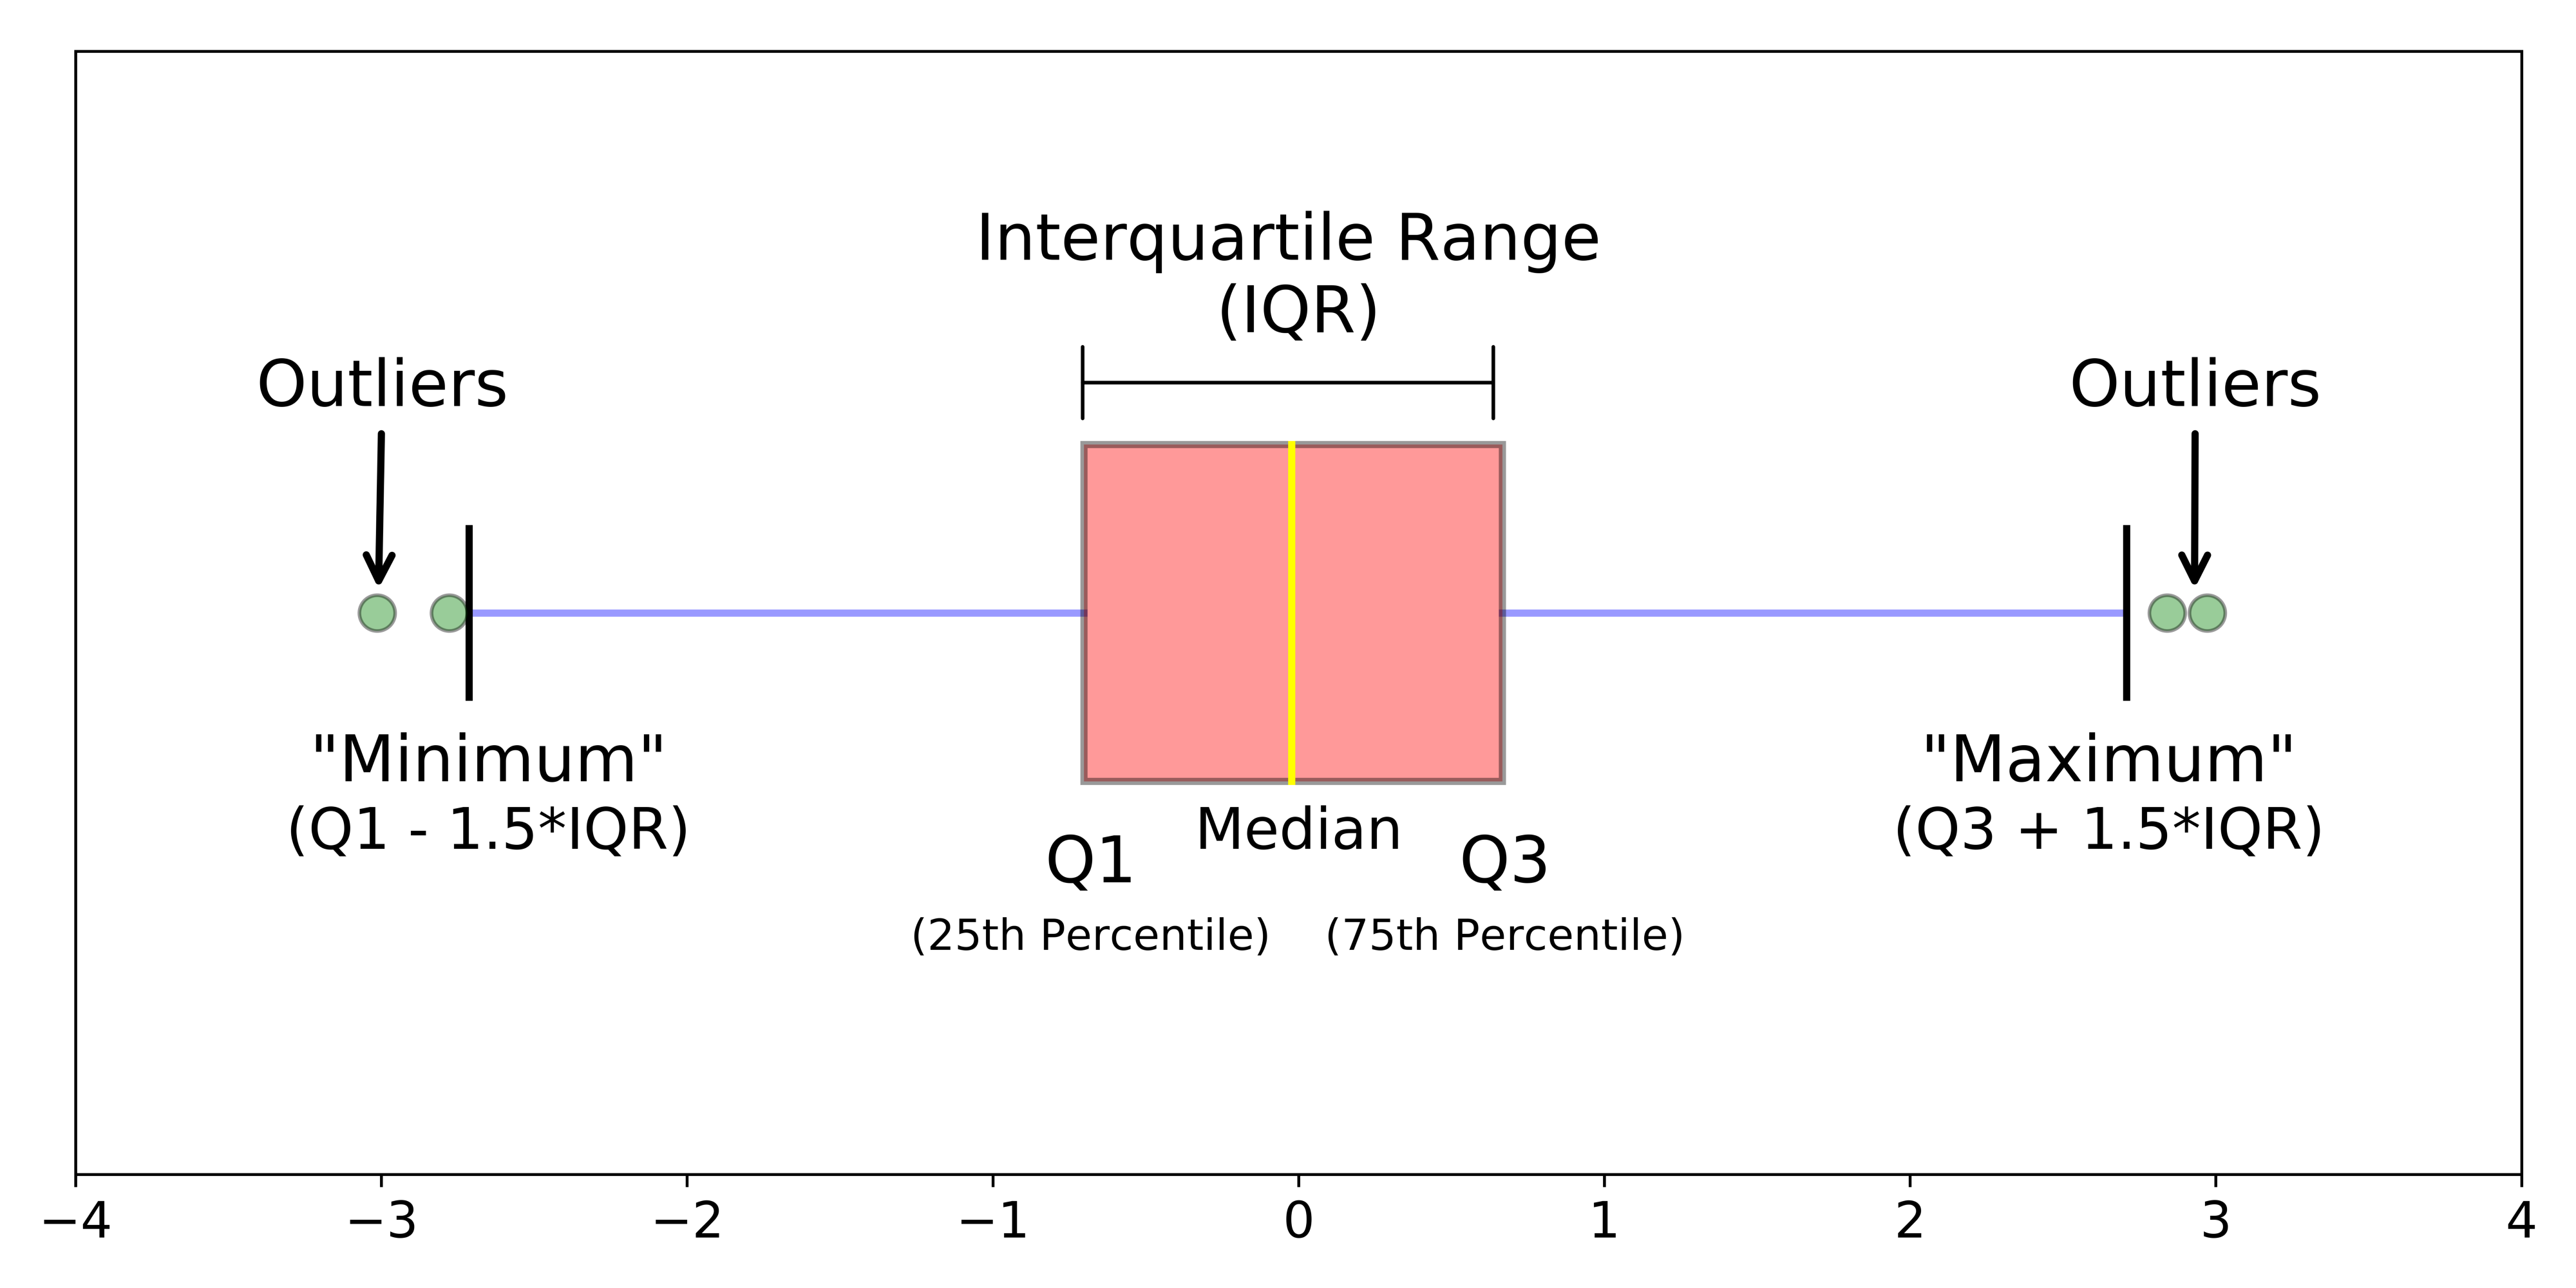

In [63]:
from IPython.display import Image
Image('./boxplot.png')

양끝은 최소와 최대를 나타내며 그 범위를 벗어난 값이 이상값

#### 타이타닉의 Fare 변수를 대상으로 시본으로 박스플롯 그려서 확인하기

In [65]:
sns.set_theme(style="whitegrid")

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

<Axes: xlabel='Fare'>

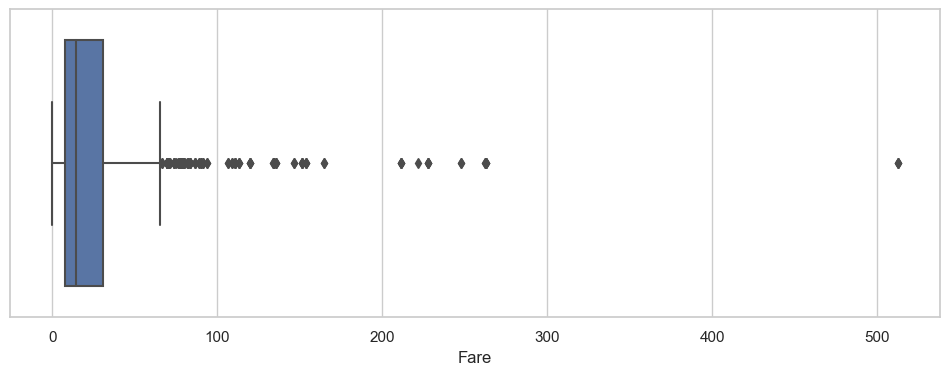

In [67]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=titanic.Fare)

<Axes: xlabel='Age'>

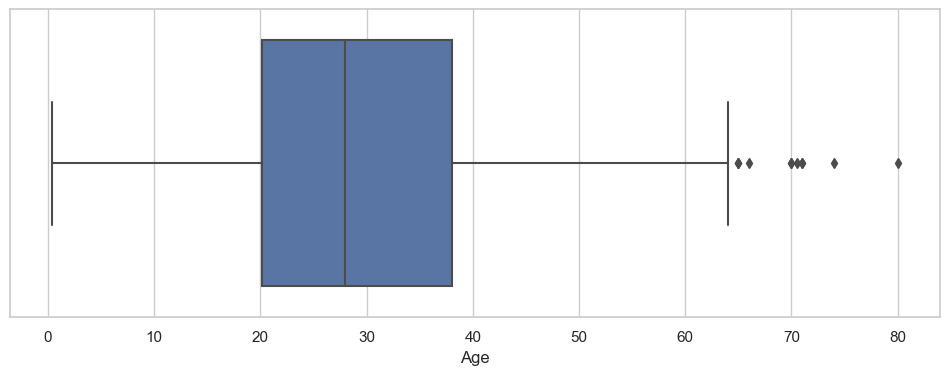

In [68]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=titanic.Age)

## IQR 기법으로 이상값 확인하기

- 시각화 기법을 통해 이상치가 어느 위치에 분포하는지 확인했으니 실제 이상값을 추출해야 함

#### [IQR 기법 적용하는 순서]
1. 1사분위수 Q1을 찾는다
2. 3사분위수 Q3를 찾는다
3. IQR을 계산한다 (Q3 - Q1)
4. 상한값 : Q3 + 1.5 * IQR / 하한값 : Q1 - 1.5 * IQR
5. 상한값과 하한값을 벗어난 범위의 값을 이상값으로 정의

In [72]:
# IQR 기법으로 함수 생성

def outlier_iqr(data, col):
    global lower, upper #하한값, 상한값 변수
    
    q1, q3 = np.quantile(data[col], .25), np.quantile(data[col], .75)
    iqr = q3 - q1
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    
    print('IQR : ', iqr)
    print('하한값 : ', lower)
    print('상한값 : ', upper)
    
    data1 = data[data[col] > upper]
    data2 = data[data[col] < lower]
    
    return print('이상값의 총 개수 : ', data1.shape[0] + data2.shape[0])

In [73]:
#타이타닉 데이터셋의 Fare 변수로 이상값 분류하기

outlier_iqr(titanic, 'Fare')

IQR :  23.0896
하한값 :  -26.724
상한값 :  65.6344
이상값의 총 개수 :  116


## 히스토그램
- matplotlib의 axvspan을 활용하여 이상값의 범위를 강조하자

C:\Users\serye\AppData\Local\Temp\ipykernel_26716\3828394172.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic.Fare, bins=50, kde=False)


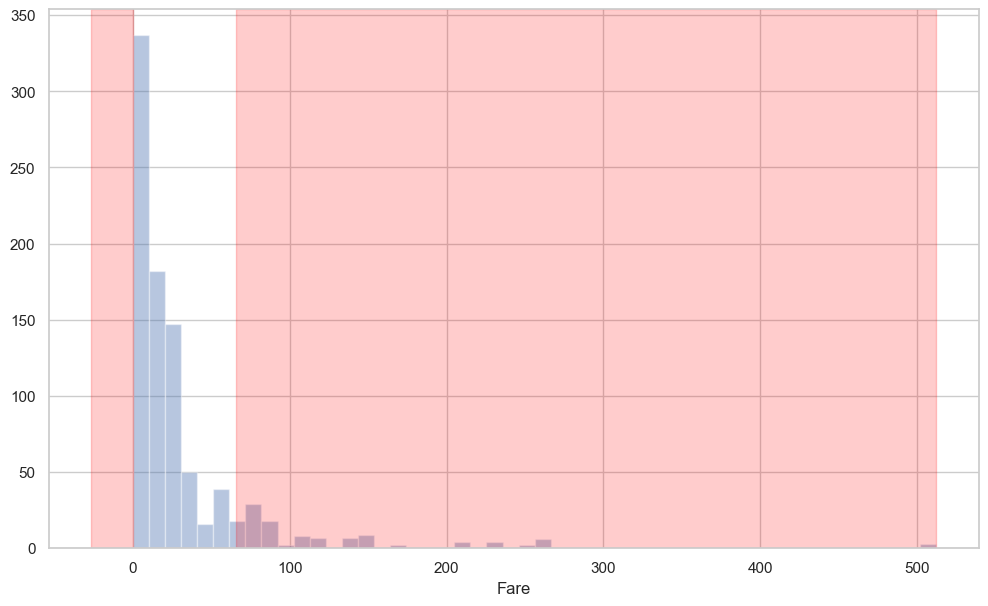

In [76]:
plt.figure(figsize=(12, 7))
sns.distplot(titanic.Fare, bins=50, kde=False)

#이상값 영역 박스 그리기
plt.axvspan(xmin=lower, xmax=titanic.Fare.min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=titanic.Fare.max(), alpha=0.2, color='red')

## 이상값 삭제하기

In [77]:
# 하한값 ~ 상한값 사이의 데이터는 정상값

titanic[(titanic['Fare'] < upper) & (titanic['Fare'] > lower)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
